<img src="mmu_logo.png" style="height: 80px;" align=left>  

# Learning Objectives

Towards the end of this lesson, you should be able to:
- perform preliminary investigation on dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# Read data

In [5]:
# read the csv file

df = pd.read_csv("data.csv")

In [10]:
# check dimensionality
# your answer here...

df.shape
df.ndim

2

In [12]:
# get the last 5 records
df.tail()

AttributeError: 'DataFrame' object has no attribute 'top'

In [13]:
# list all the columns in the dataset

df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Checking data types (attribute types)
**It's important to check data types to make sure they are correct. Sometimes a numeric column can be treated as an object type because there are junk text mixed in the data...**

In [14]:
type(df)

pandas.core.frame.DataFrame

**Try change Outlet_Establishment_Year to float**

In [20]:
# errors="coerce" will make sure any non-numeric will be converted into NaN
df["Outlet_Establishment_Year"] = pd.to_numeric(df["Outlet_Establishment_Year"],errors="coerce",downcast="float")

In [21]:
# check the output of Outlet_Establishment_Year
df["Outlet_Establishment_Year"]

0       1999.0
1       2009.0
2       1999.0
3       1998.0
4       1987.0
         ...  
8518    1987.0
8519    2002.0
8520    2004.0
8521    2009.0
8522    1997.0
Name: Outlet_Establishment_Year, Length: 8523, dtype: float32

# Missing data
**To check if there is any missing data:**

In [28]:
# check the number of records with NaN
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
# total up the records with NaN

len(df[df.isna().any(axis=1)])

3873

In [29]:
# Remove rows with NaN

dfdropnna = df.dropna()


In [30]:
# fill NA with 100
dffilna = df.fillna(100)
 

# Removing duplicated Data

In [31]:
print("Total duplicated rows: ", sum(df.duplicated()))

# drop duplicates
df.drop_duplicates()


Total duplicated rows:  0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987.0,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004.0,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1845.5976


# Measuring Central Tendency (Mean, median, mode)

In [32]:
# All in one except "mode", also including quartile range, standard deviation and min max.
df.describe() # by default only returns numeric type columns, use the parameter include="all" to include all dtypes

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831787,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [40]:
# To get the mean, median and mode of a feature, you can use pandas .mean() .median() or .mode() function
# your answer here...
mean,median,mode = df.mean(),df.median(),df.mode()
mode

/tmp/ipykernel_29123/1350161470.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean,median,mode = df.mean(),df.median(),df.mode()
/tmp/ipykernel_29123/1350161470.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean,median,mode = df.mean(),df.median(),df.mode()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDG33,12.15,Low Fat,0.0,Fruits and Vegetables,172.0422,OUT027,1985.0,Medium,Tier 3,Supermarket Type1,958.752
1,FDW13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# These measures can also be useful in descriptive analytics, for instance

# Get the mean/average sales in 2009 by item_type
filtered = df[df["Outlet_Establishment_Year"] == 2009.0]

a=filtered.groupby("Item_Type").sum()
a

/tmp/ipykernel_29123/297294864.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=filtered.groupby("Item_Type").sum()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,


# Visualizing distribution of data
**Simple plots can be done fast using pandas .plot(), alternatively seaborn is also quite good**

## Histogram

In [44]:
df["Item_Outlet_Sales"]

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

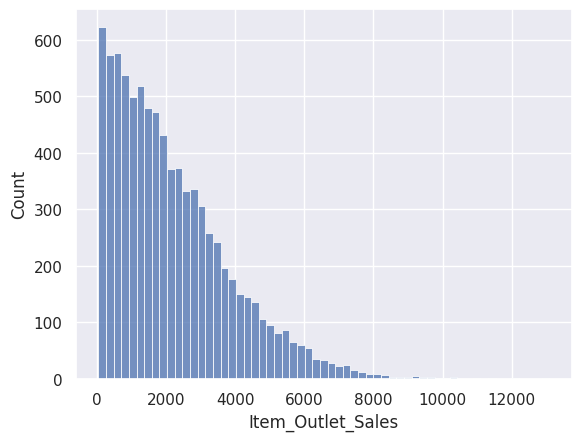

In [46]:
# your codes here...
sns.histplot(data=df["Item_Outlet_Sales"])

## Histogram + density plot

<AxesSubplot: >

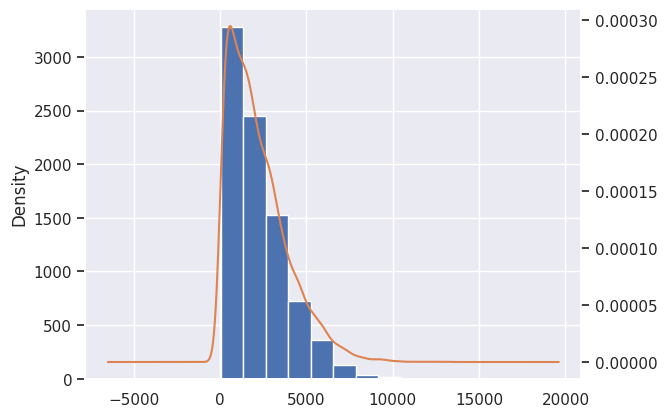

In [47]:
ax = df["Item_Outlet_Sales"].plot(kind="hist")
df["Item_Outlet_Sales"].plot(kind="kde", ax=ax, secondary_y=True)

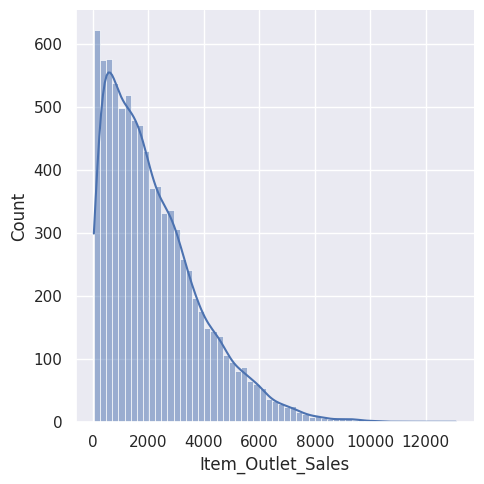

In [54]:
# Use Seaborn for the histogram + density plot

sns.displot(data=df["Item_Outlet_Sales"],kde="true")

### We can quantify skewness by:

In [56]:
# your codes here... 
df.skew()

/tmp/ipykernel_29123/296640384.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396656
Item_Outlet_Sales            1.177531
dtype: float64

### Transformation to reduce skewness
- Common transformations are log, square root, or cube root to reduce positive skewness
- If it is negatively skewed, you can use log, cube root or square transformation

In [58]:
sqrt_transform = np.sqrt(df["Item_Outlet_Sales"])

# your answer here...
df["Item_Outlet_Sales"] = np.sqrt(df["Item_Outlet_Sales"])
df["Item_Visibility"] = np.sqrt(df["Item_Visibility"])
df["Item_Weight"] = np.sqrt(df["Item_Weight"])
df["Item_MRP"] = np.sqrt(df["Item_MRP"])

df["Outlet_Establishment_Year"] = np.cbrt(df["Outlet_Establishment_Year"])

df.skewew()


/tmp/ipykernel_29123/1717981415.py:11: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                 -0.144634
Item_Visibility             -0.098056
Item_MRP                    -0.283892
Outlet_Establishment_Year   -0.399254
Item_Outlet_Sales            0.234676
dtype: float64

## Q-Q Plot / Normality test

In [63]:
import statsmodels.api as sm
from scipy import stats
from scipy.stats import normaltest # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

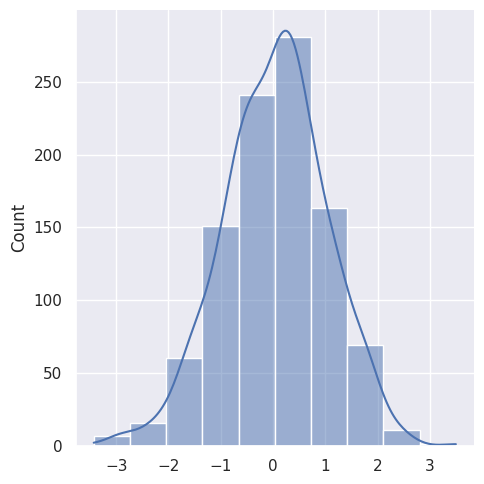

In [71]:
test = np.random.normal(0,1, 1000) # generate random data

# displot here...
sns.displot(data = test,kde="true",bins=10)

#### QQ plot to visualize normality

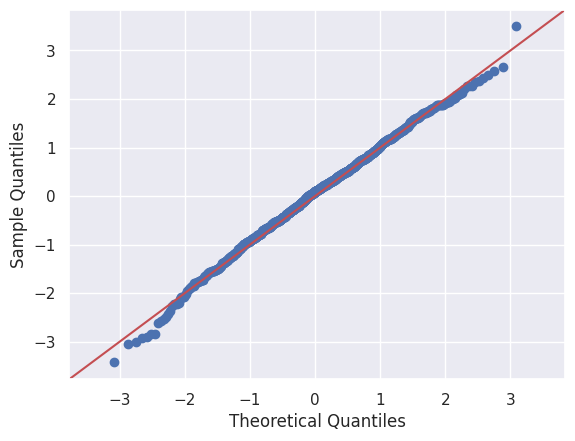

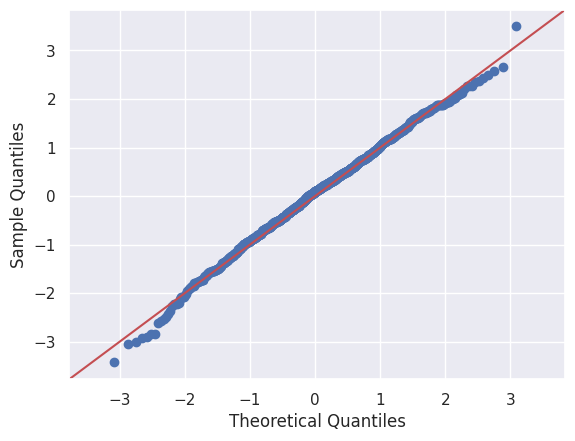

In [74]:
# your codes h, ere...
sm.qqplot(data=test,line="45")


#### Alternatively, a normality test

In [ ]:
# normality test, it's more efficient to do a normality test rather than plot q-q plot for all features in your dataset, especially when your data has a lot features.
k2, p = normaltest(test)
alpha = 1e-3
print("p = {:g}".format(p)) # a big p value means it's close to normal

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

## Bar plot

In [ ]:
# Plot a bar plot for Item_Type


## Box Plot

In [ ]:
# Plot a boxplot for Item_Outlet_Sales
 

In [ ]:
# Plot a boxplot with Outlet_Type as category (x-axis)

fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=ax)

## Correlation plot

/tmp/ipykernel_29123/2928809035.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

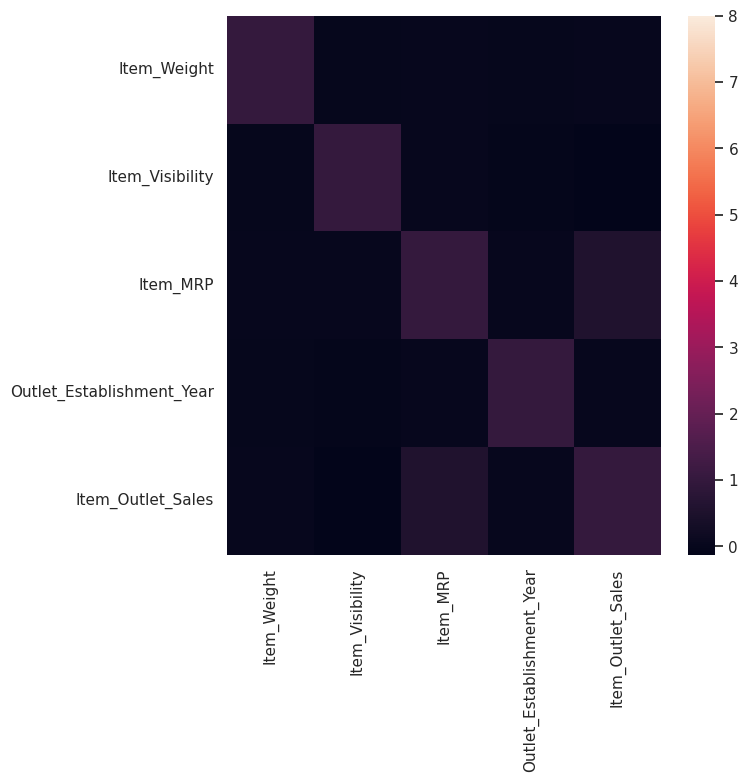

In [76]:
corr = df.corr()

plt.figure(figsize=(7,7))

# Plot a heatmap for df using Seaborn

sns.heatmap(corr,vmax =8)

## Scatterplot


In [ ]:
# Plot a scatter plot for Item_Weight vs. Item_Outlet_Sales

 

In [ ]:
# Plot a scatter plot for Item_MRP vs. Item_Outlet_Sales

 